In [12]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [31]:
# Loading the dataset
df = pd.read_excel("Restaurant_Reviews .xlsx")

In [32]:
df.shape

(1000, 2)

In [33]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [34]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Data Preprocessing**

In [35]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import pandas as pd
import re

# Assuming df is your DataFrame with a 'Review' column
# Check the data type of the 'Review' column
print(df['Review'].dtype)

# Convert the 'Review' column to string type if necessary
df['Review'] = df['Review'].astype(str)

# Iterate over the DataFrame to process each review
corpus = []
for i in range(1000):
    review = df['Review'][i]
    
    # Cleaning special characters from the review using regex
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=review)
    
    # Converting the entire review into lowercase
    review = review.lower()
    
    # Append the cleaned and processed review to the corpus list
    corpus.append(review)

# Print the processed corpus to verify
print(corpus[:5])  # Print the first 5 processed reviews


object
['wow    loved this place ', 'crust is not good ', 'not tasty and the texture was just nasty ', 'stopped by during the late may bank holiday off rick steve recommendation and loved it ', 'the selection on the menu was great and so were the prices ']


In [39]:
corpus[0:10]

['wow    loved this place ',
 'crust is not good ',
 'not tasty and the texture was just nasty ',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it ',
 'the selection on the menu was great and so were the prices ',
 'now i am getting angry and i want my damn pho ',
 'honeslty it didn t taste that fresh  ',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ',
 'the fries were great too ',
 'a great touch ']

In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# **Model Building**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [42]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [44]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 80.5%
Precision score is: 0.81
Recall score is: 0.81


In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[78, 19],
       [20, 83]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

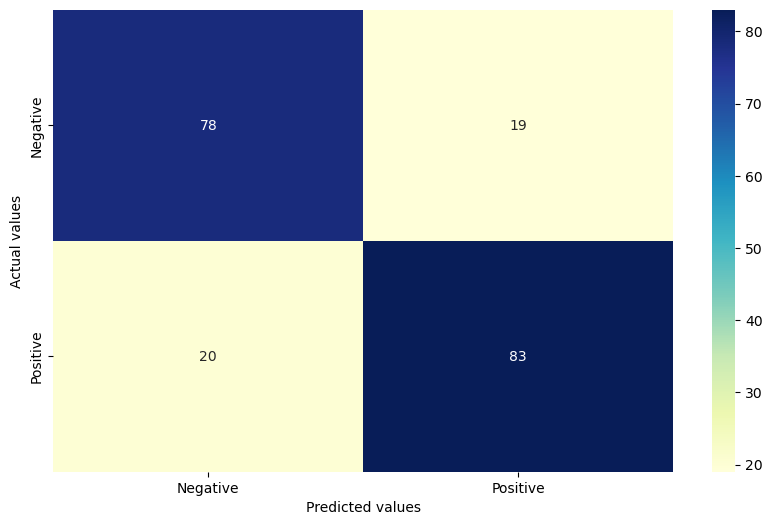

In [47]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [48]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.5%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 79.5%
Accuracy score for alpha=0.4 is: 81.0%
Accuracy score for alpha=0.5 is: 81.5%
Accuracy score for alpha=0.6 is: 81.0%
Accuracy score for alpha=0.7 is: 81.0%
Accuracy score for alpha=0.8 is: 80.5%
Accuracy score for alpha=0.9 is: 80.5%
Accuracy score for alpha=1.0 is: 80.5%
--------------------------------------------
The best accuracy is 81.5% with alpha value as 0.5


In [49]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# **Predictions**

In [50]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [51]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [52]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [53]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
